In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (1).csv


In [ ]:
import pandas as pd

# If your uploaded file was named 'data.csv'
df = pd.read_csv('data.csv', sep=';')  # adjust name as needed

# Preview data
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
# Check for missing values
print(df.isnull().sum())

# If there are missing values, you can drop or fill them. For example:
df.dropna(inplace=True)  # removes rows with missing values

# Confirm shape after cleaning
print(f"Data shape after cleaning: {df.shape}")


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Train set shape: (3096, 36), Test set shape: (1328, 36)
Accuracy: 0.7681
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       427
           1       0.78      0.93      0.85       663
           2       0.55      0.34      0.42       238

    accuracy                           0.77      1328
   macro avg       0.72      0.68      0.69      1328
weighted avg       0.75      0.77      0.75      1328



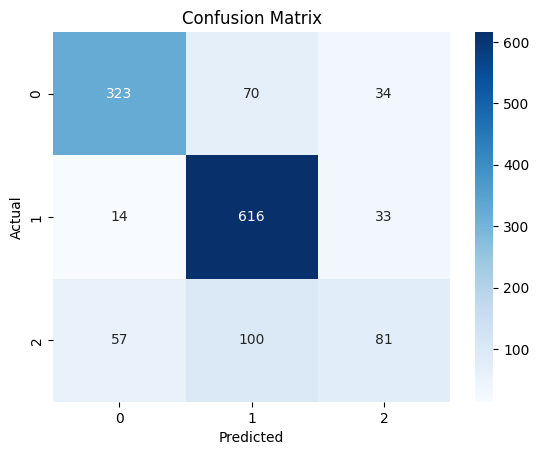

In [ ]:
# 1. Map Target column to numbers
target_map = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}
df['Target'] = df['Target'].map(target_map)

# 2. Encode categorical columns (excluding Target)
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object').columns:
    if col != 'Target':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# 3. Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

# 4. Scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

print(f"Train set shape: {X_train.shape}, Test set shape: {X_test.shape}")

# 6. Train a model (e.g., Random Forest)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. Predict & Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Data Info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification 

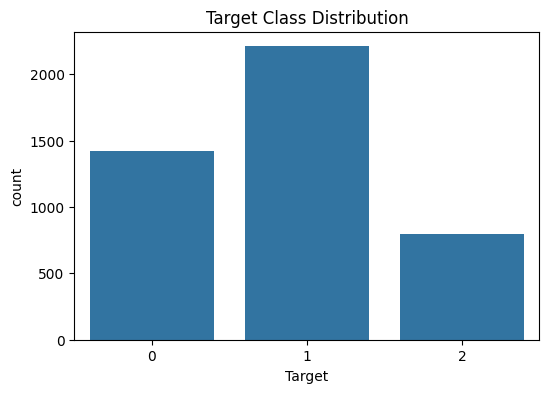

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


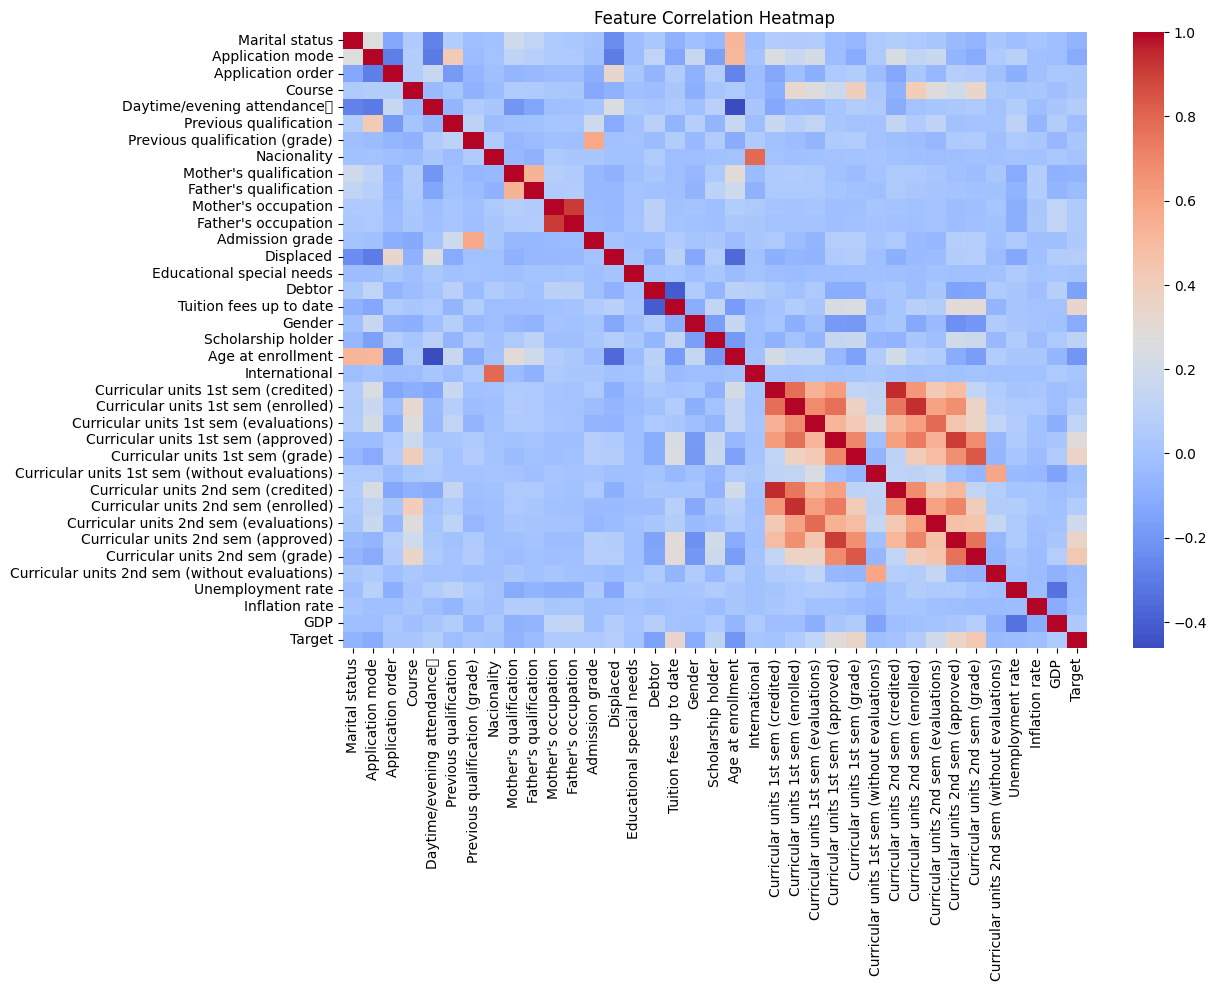

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


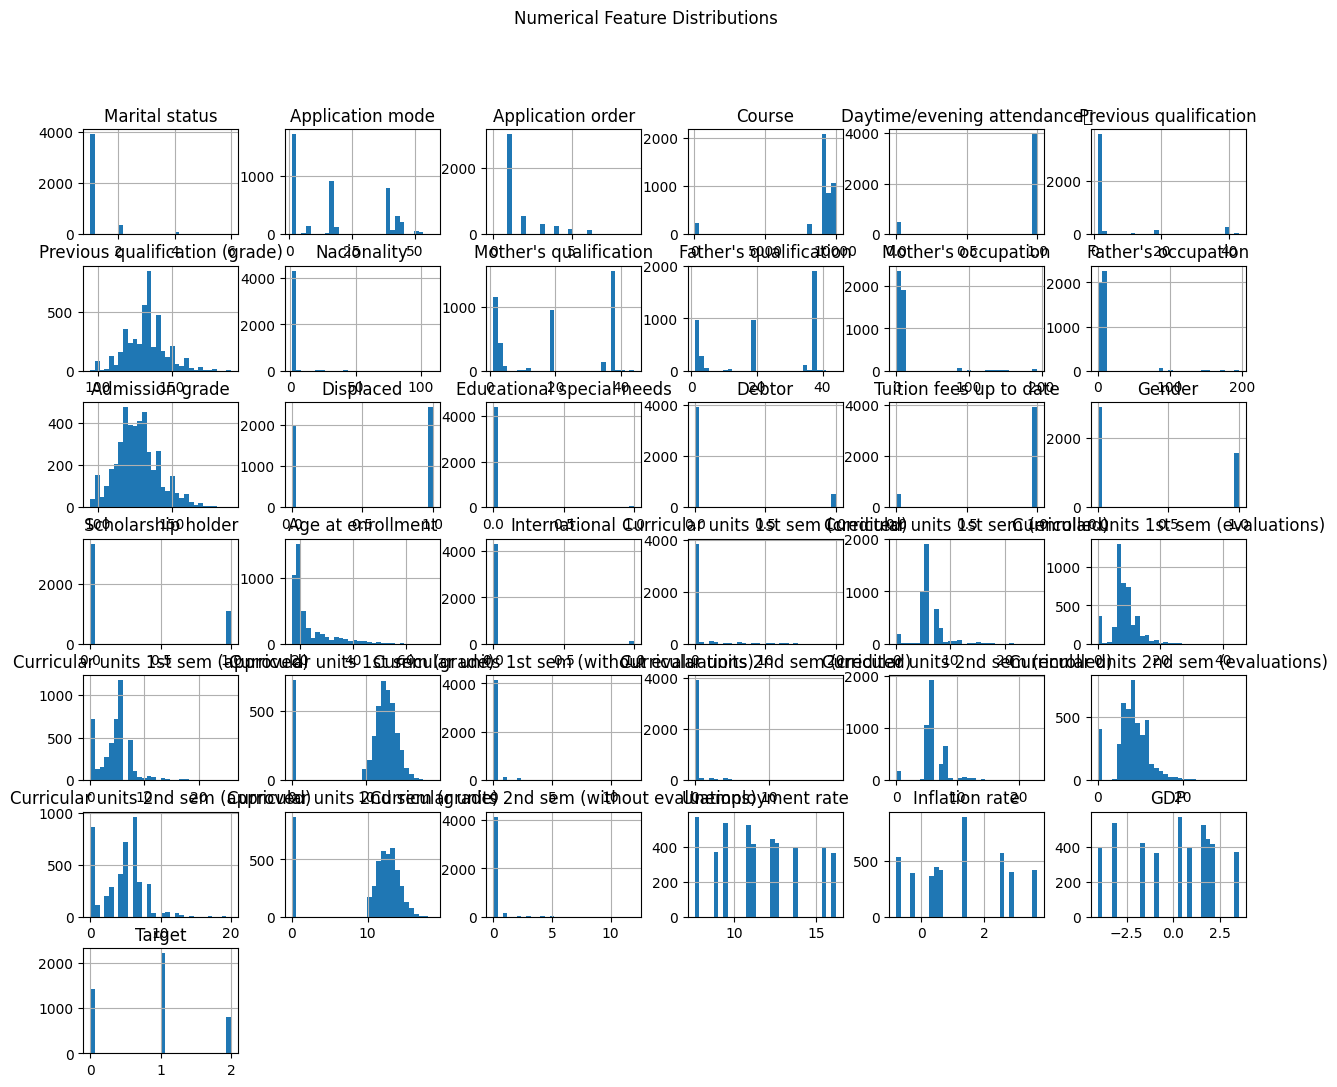

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def exploratory_data_analysis(df):
    print("### Data Info ###")
    print(df.info())
    print("\n### Descriptive Statistics ###")
    print(df.describe(include='all'))

    # Distribution of Target
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='Target')
    plt.title('Target Class Distribution')
    plt.show()

    # Correlation heatmap for numeric features
    plt.figure(figsize=(12,8))
    sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    plt.show()

    # Histograms for numerical features
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    df[numeric_cols].hist(figsize=(15,12), bins=30)
    plt.suptitle('Numerical Feature Distributions')
    plt.show()
exploratory_data_analysis(df)


In [ ]:
# Show general info
print("### Data Info ###")
print(df.info())

# Show descriptive stats for all columns (numeric + categorical)
print("\n### Descriptive Statistics ###")
display(df.describe(include='all'))

# Show skewness and kurtosis for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nSkewness:")
display(df[numeric_cols].skew())
print("\nKurtosis:")
display(df[numeric_cols].kurtosis())

# Show counts for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts())


### Data Info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification 

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.858273
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.693326
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000



Skewness:


,0
Marital status,4.399764
Application mode,0.393036
Application order,1.881050
Course,-3.809135
Daytime/evening attendance\t,-2.507238
Previous qualification,2.871207
Previous qualification (grade),0.312867
Nacionality,10.703998
Mother's qualification,0.001978
Father's qualification,-0.298697



Kurtosis:


,0
Marital status,21.482639
Application mode,-1.453806
Application order,2.651289
Course,13.199149
Daytime/evening attendance\t,4.288179
Previous qualification,6.778166
Previous qualification (grade),0.968258
Nacionality,135.146206
Mother's qualification,-1.692292
Father's qualification,-1.580592


In [ ]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")
    return lower_bound, upper_bound

# Example: detect and cap outliers for skewed features
skewed_features = [
    'Nacionality',
    'Educational special needs',
    "Mother's occupation",
    "Father's occupation",
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (without evaluations)'
]

for col in skewed_features:
    lb, ub = detect_outliers_iqr(df, col)
    # Cap outliers
    df[col] = df[col].clip(lower=lb, upper=ub)


Nacionality: 110 outliers detected
Educational special needs: 51 outliers detected
Mother's occupation: 182 outliers detected
Father's occupation: 177 outliers detected
Curricular units 1st sem (without evaluations): 294 outliers detected
Curricular units 2nd sem (without evaluations): 282 outliers detected


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set default style
sns.set(style='whitegrid')


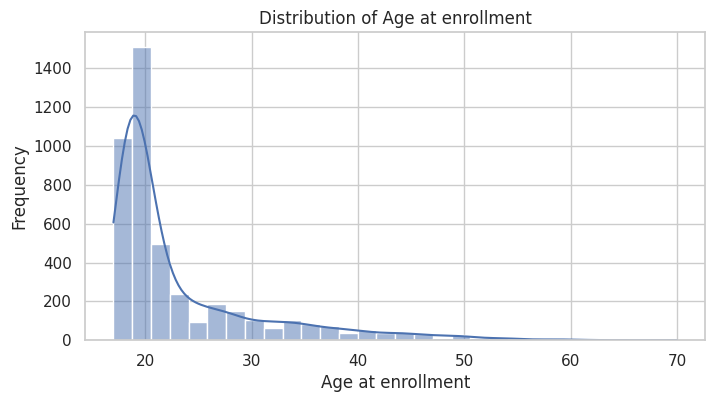

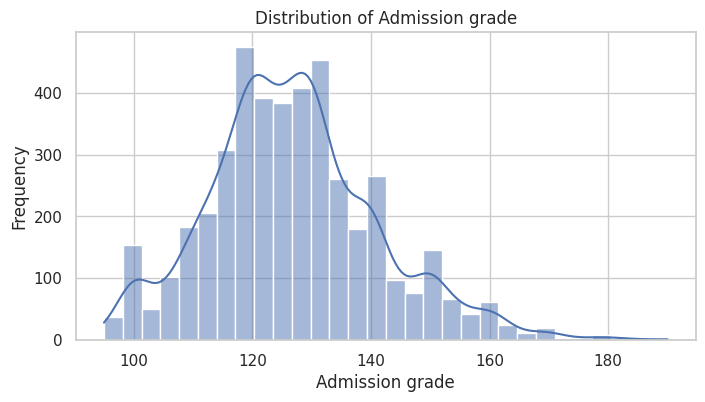

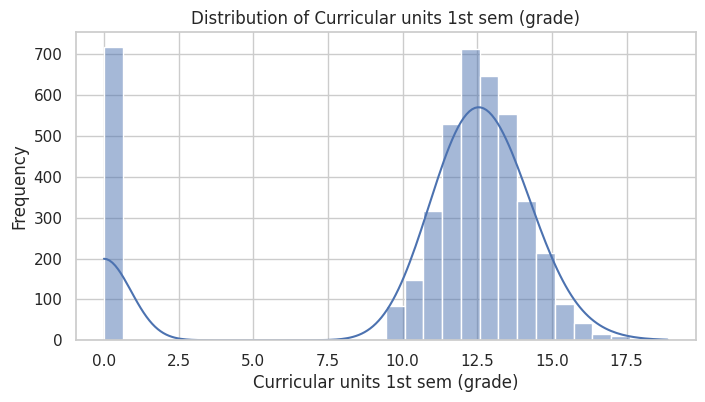

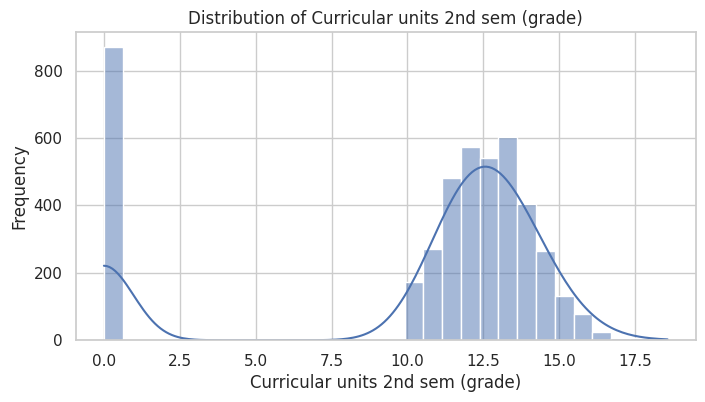

In [ ]:
num_cols = ['Age at enrollment', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


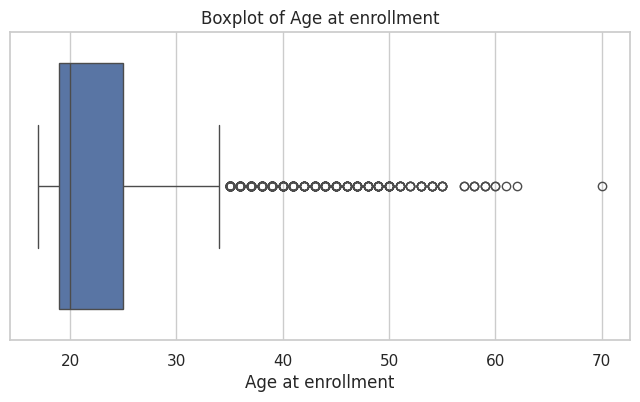

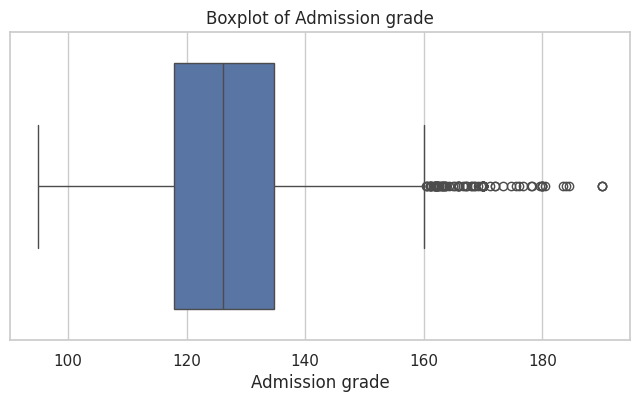

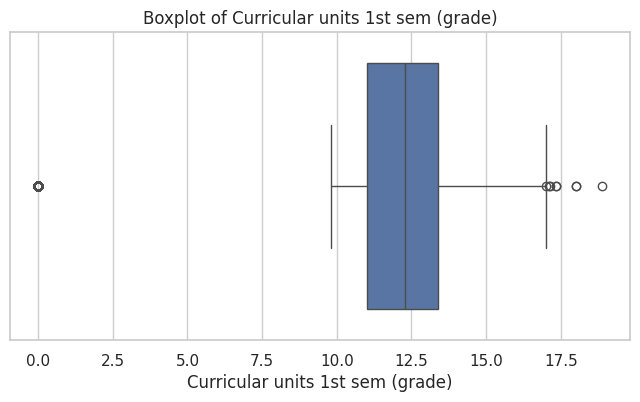

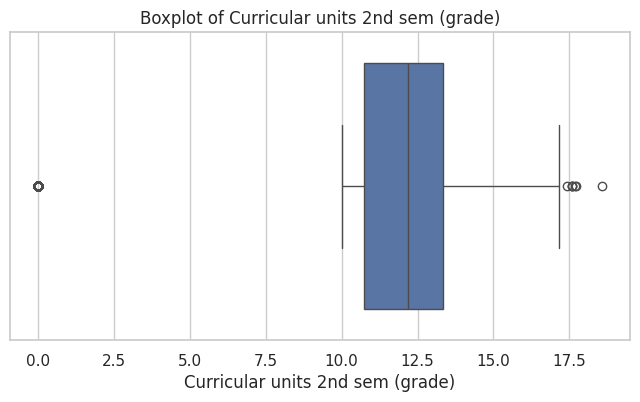

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


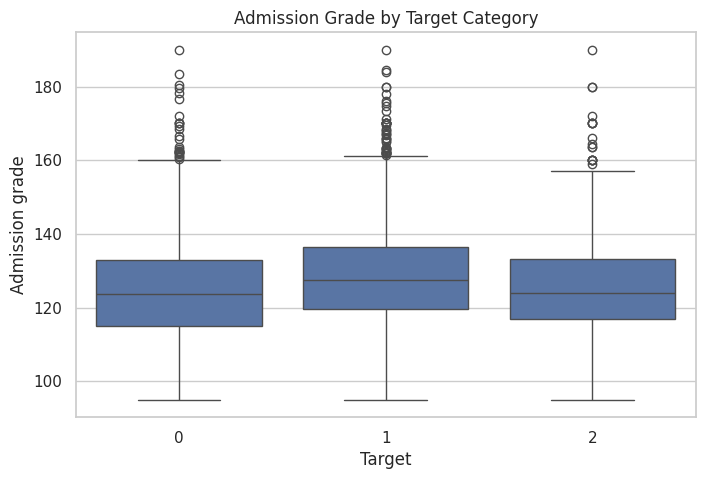

In [ ]:
# Example: Admission grade vs Target
plt.figure(figsize=(8, 5))
sns.boxplot(x='Target', y='Admission grade', data=df)
plt.title('Admission Grade by Target Category')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


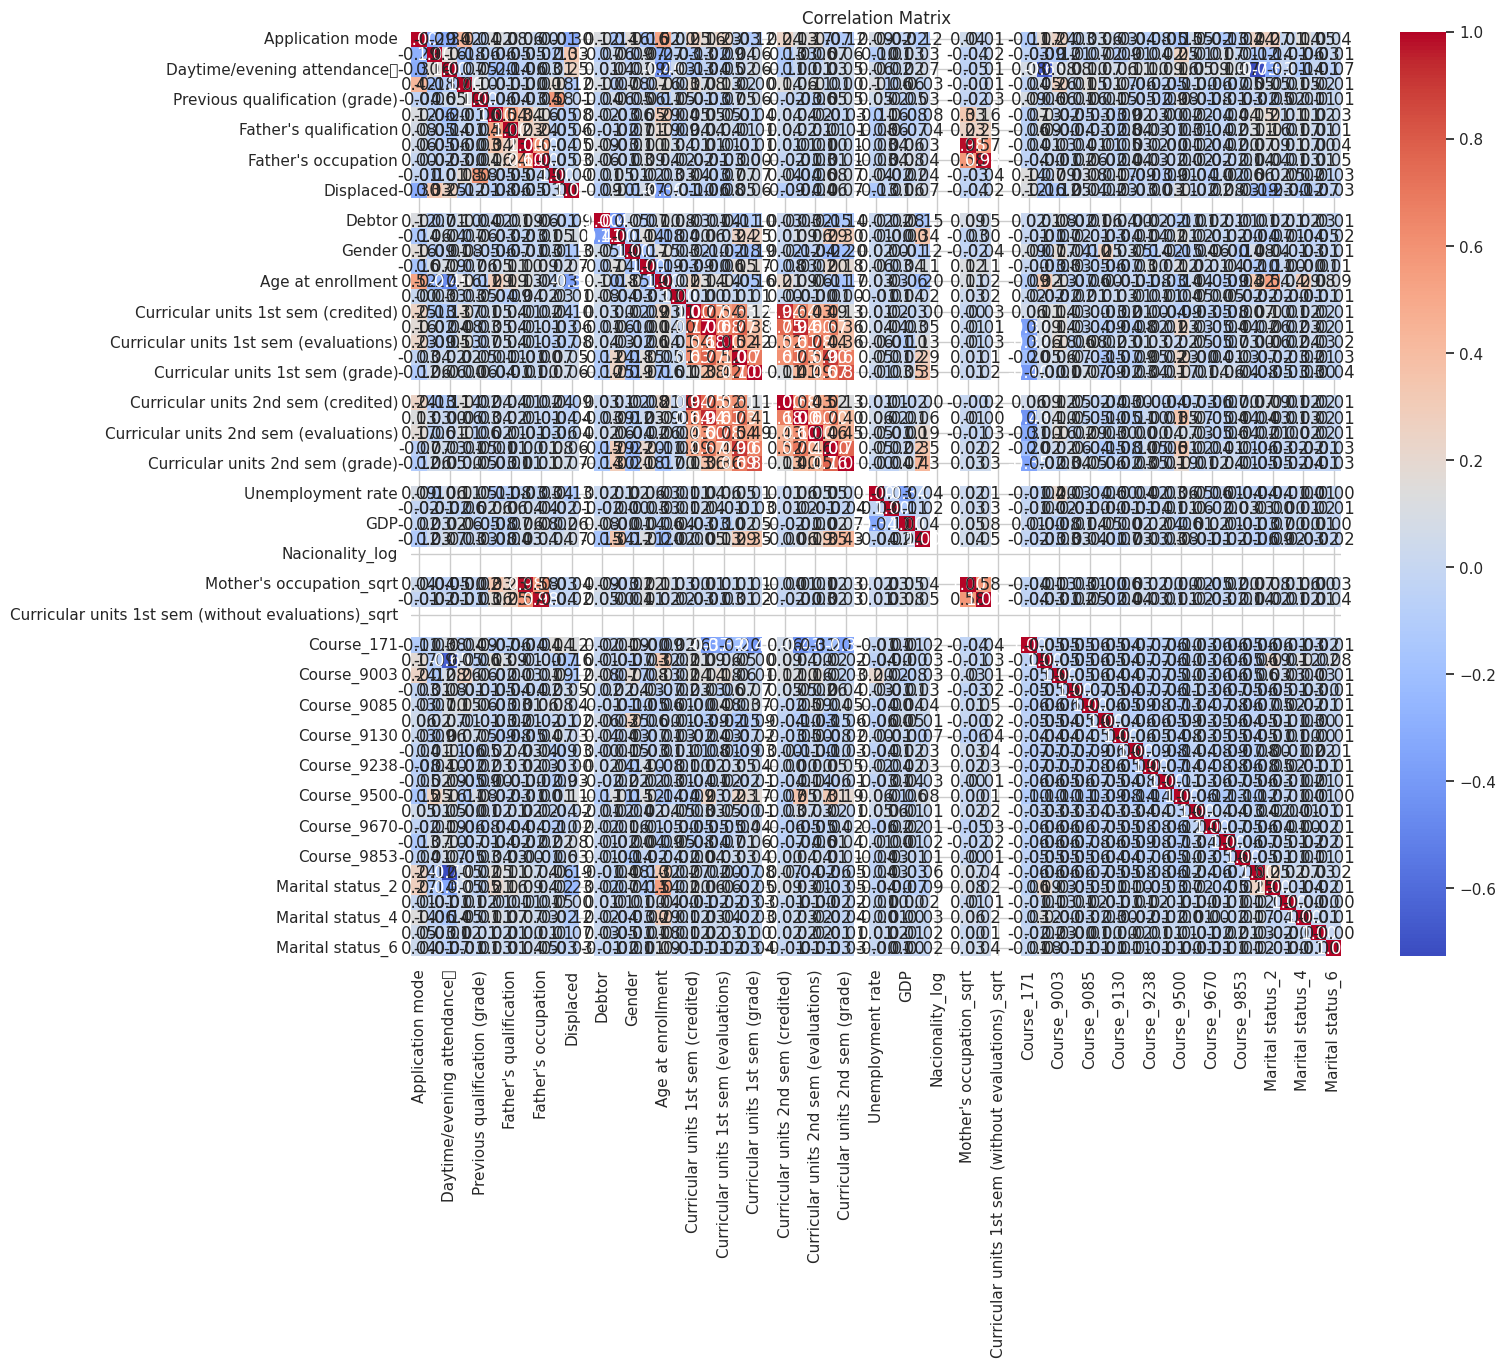